In [1]:
import mnist
import numpy as np
import scipy.ndimage

## Load in mnist, and pick one picture

In [2]:
train_mnist = mnist.train_images()
train_mnist_labels = mnist.train_labels()
pick_index = 18 # 23 # 5

# picked_picture = train_mnist[pick_index][5:-5,5:-5]
picked_picture = train_mnist[pick_index]

print('picked_picture has label', train_mnist_labels[pick_index])
print('picked_picture has shape', picked_picture.shape)

num_rows_image, num_cols_image = picked_picture.shape[0], picked_picture.shape[1]

picked_picture has label 6
picked_picture has shape (28, 28)


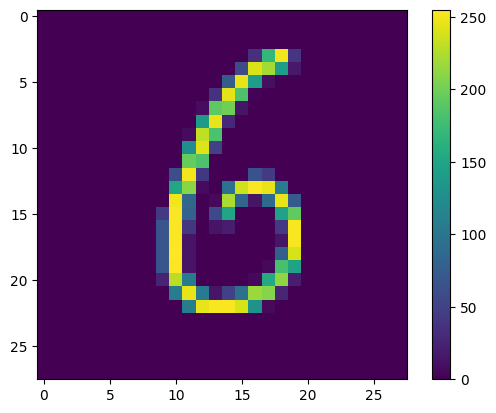

In [3]:
import matplotlib.pyplot as plt

plt.imshow(picked_picture) 
plt.colorbar() 
plt.show()

## Rotate images and store them in an array

In [4]:
def get_rotations(img, rotation_steps):
    for rot in rotation_steps:
        img_ = scipy.ndimage.rotate(img, rot, reshape=False) # newly modified
        yield img_ # newly modified

In [5]:
num_timeframes = 100
start_angle = -70
end_angle = 70
rotation_steps = np.linspace(start_angle, end_angle, num_timeframes)
train_rotations = []

for idx, rotation in enumerate(get_rotations(picked_picture, rotation_steps)):
    train_rotations.append(rotation)

train_rotations = np.array(train_rotations)

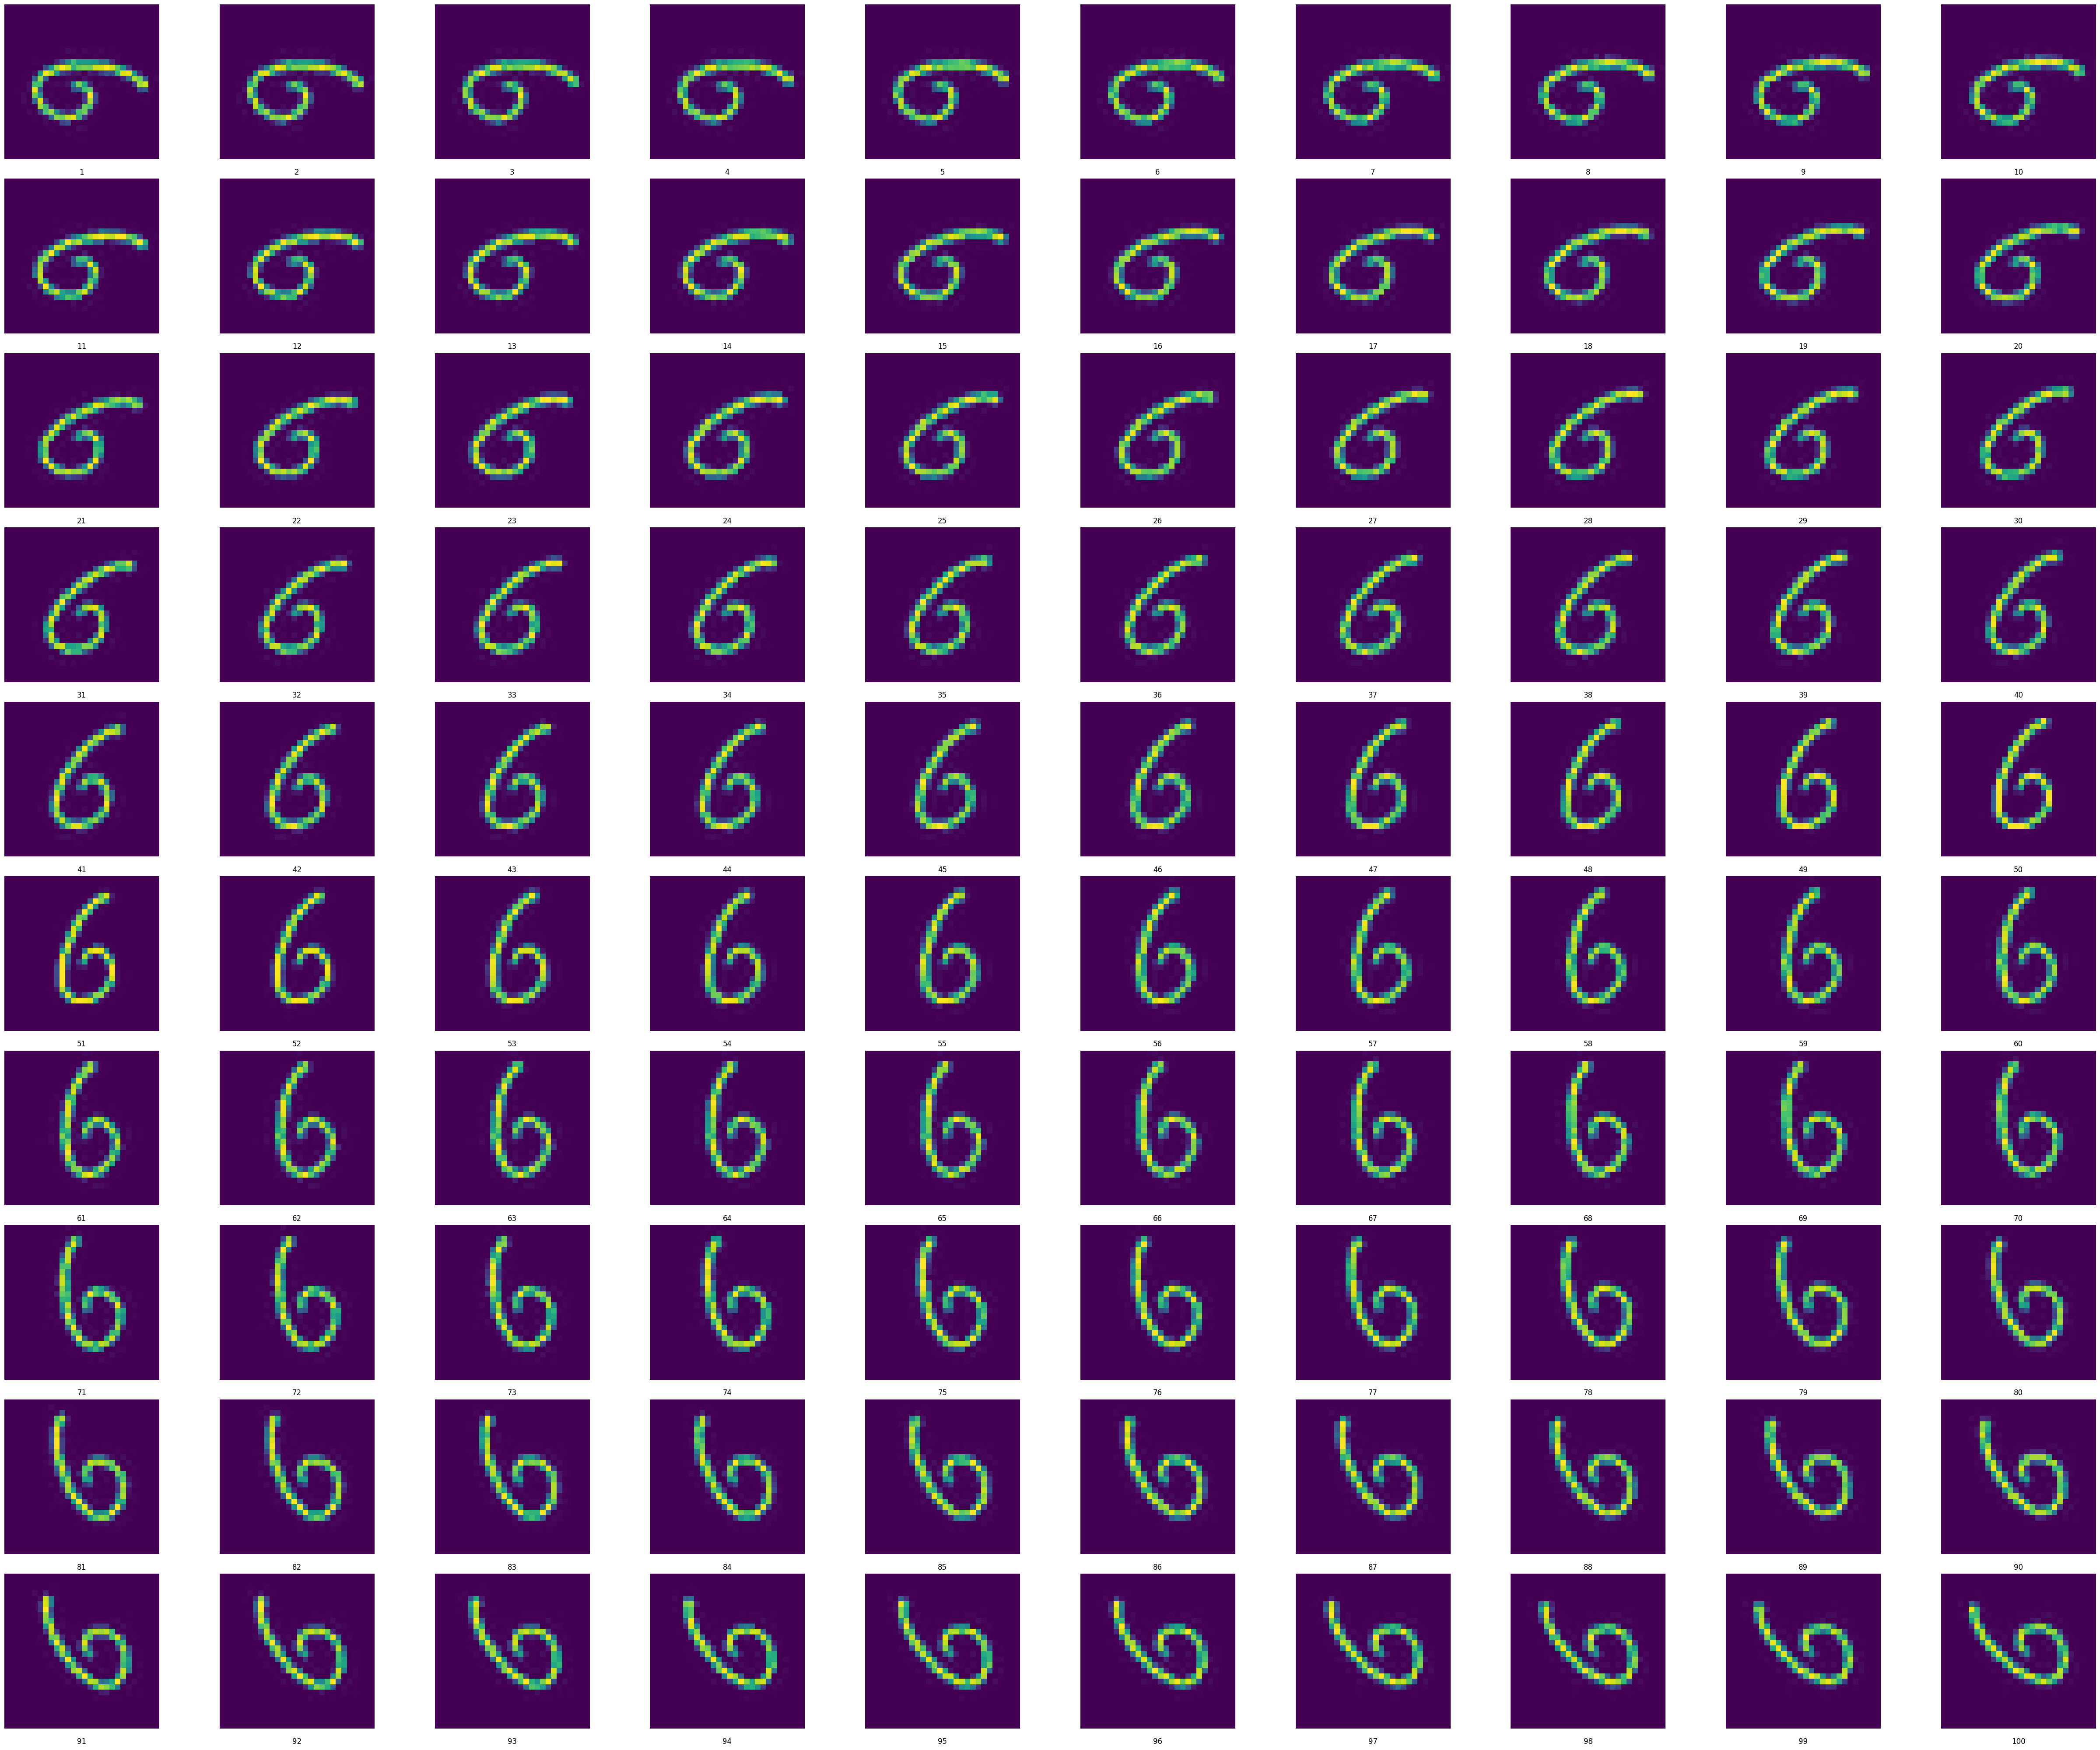

In [6]:
import math
num_images = rotation_steps.shape[0]
images_per_row = 10

num_rows = math.ceil(num_images / images_per_row)
fig = plt.figure(figsize=(50, 40))

for i, image in enumerate(train_rotations):
    row = i // images_per_row
    col = i % images_per_row

    ax = fig.add_subplot(num_rows, images_per_row, i + 1)
    ax.imshow(image)
    ax.axis('off') 
    ax.text(0.5, -0.1, f"{i+1}", size=12, ha="center", transform=ax.transAxes)

plt.tight_layout() 
plt.show()

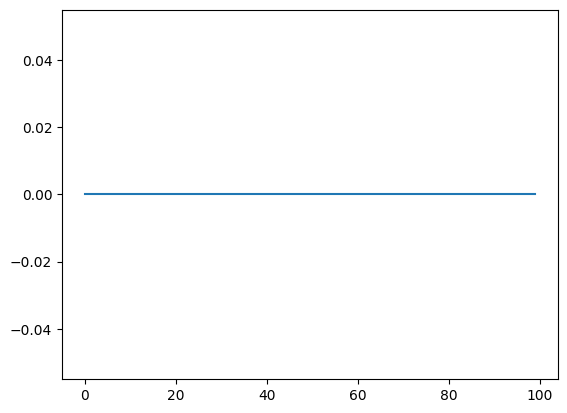

In [7]:
x_indx = 1
y_indx = 2
plt.plot(train_rotations[:, x_indx, y_indx])

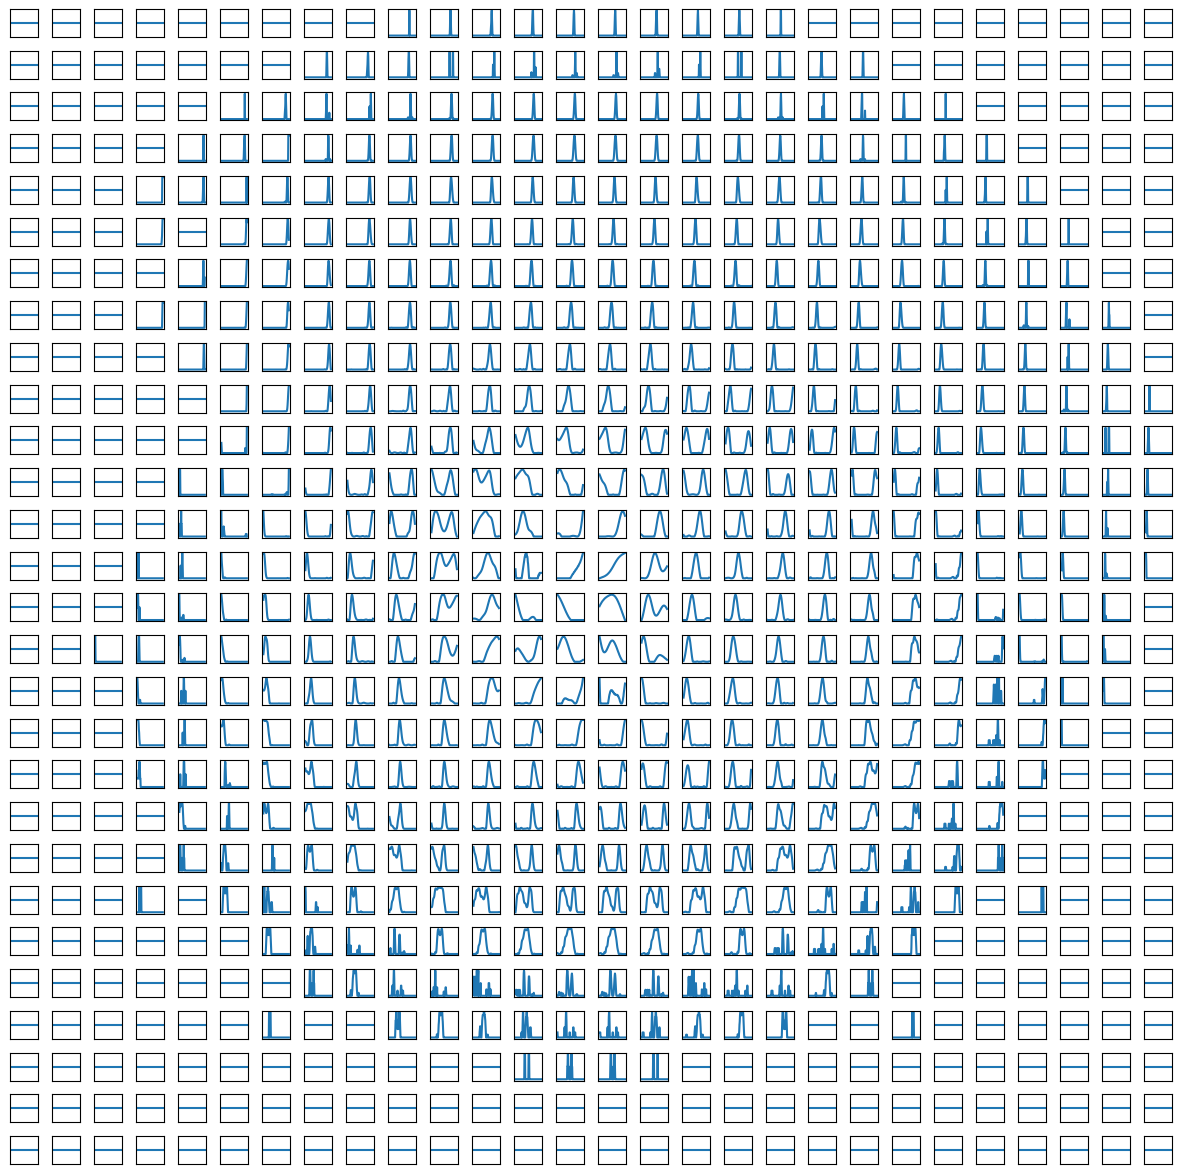

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure with 28x28 subplots
fig, axs = plt.subplots(num_rows_image, num_cols_image, figsize=(15, 15))

# Adjusting the layout
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Looping through each subplot and plotting the corresponding time series
for x in range(num_rows_image):
    for y in range(num_cols_image):
        axs[x, y].plot(train_rotations[:, x, y])
        axs[x, y].set_xticks([])
        axs[x, y].set_yticks([])

# Show the plot
plt.show()


## Save the data as .csv file

In [9]:
train_rotations_to_save = []
for x in range(num_rows_image):
    for y in range(num_cols_image):
        train_rotations_to_save.extend(list(train_rotations[:, x, y]))

assert len(train_rotations_to_save) == int(num_rows_image*num_cols_image*num_timeframes)

In [10]:
# np.array(train_rotations_to_save).reshape(28, 28, 50)[ 12, 27, :] == train_rotations[:, 12, 27]

In [11]:
# pick any idx to check the correctness of code implementation .. 
'''
idx_test = 157

num_xy = idx_test // num_timeframes
timeframe_idx = idx_test % 50
x_idx = num_xy // 28
y_idx = num_xy % 28
assert train_rotations_to_save[idx_test] == train_rotations[timeframe_idx, x_idx, y_idx]
'''

'\nidx_test = 157\n\nnum_xy = idx_test // num_timeframes\ntimeframe_idx = idx_test % 50\nx_idx = num_xy // 28\ny_idx = num_xy % 28\nassert train_rotations_to_save[idx_test] == train_rotations[timeframe_idx, x_idx, y_idx]\n'

In [12]:
# TODO
# smooth time series by injecting intermediate values to train_rotations

In [13]:
import pandas as pd

folder_path = '/Users/jiangxiaoyu/Desktop/All Projects/GPLVM_project_code/data/healing_mnist_data_v2'
pd_data = pd.DataFrame(train_rotations_to_save).to_csv(f'{folder_path}/pick_index_{pick_index}_start_angle_{start_angle}_end_angle_{end_angle}_num_steps_{num_timeframes}_shape_{num_rows_image}_{num_cols_image}.csv', index=False)
